In [1]:
import pandas as pd
import numpy as np
import sklearn
from xgboost import XGBClassifier
import xgboost
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle
from sklearn.utils import shuffle
import json
import os
from xgboost import XGBClassifier
from matplotlib import pyplot

In [2]:
#Don't use datetime, Don't use categorical features, xgboost doesn't do those, first one hot encode
featuresToUse = ['visitor_hist_starrating', 'visitor_hist_adr_usd',
       'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance_x', 'comp1_rate', 'comp1_inv',
                 'mean_prop_starrating',
       'mean_prop_review_score', 'mean_prop_brand_bool',
       'mean_prop_location_score1', 'mean_prop_location_score2',
       'mean_prop_log_historical_price','cluster__0','cluster__1','cluster__2','cluster__3','cluster__4','cluster__5','bookingSum','orig_destination_distance_y']
labelToPredict = 'click_bool'
neededVars = ['srch_id','booking_bool']
nameOfModel = "models/7mayClicking"

In [3]:
df = pd.read_csv('../data/80PercentTrainWithMean.csv', delimiter=",",usecols=featuresToUse+[labelToPredict]+neededVars)
dfNeeded= df[neededVars+[labelToPredict]]
Y = df[labelToPredict]
df.drop(neededVars+[labelToPredict],axis=1,inplace=True)

Lets train it on clicking

In [4]:
# construct xgboost.DMatrix from numpy array, treat -999.0 as missing value
#xgmat = xgboost.DMatrix( df, label=y_train)
xgmat = xgboost.DMatrix( df, label=Y)
# setup parameters for xgboost
param = {}
# use logistic regression loss, use raw prediction before logistic transformation
# since we only need the rank
param['objective'] = 'reg:logistic'
# scale weight of positive examples
param['scale_pos_weight'] = sum(Y==0)/sum(Y==1)
param['eta'] = 0.1
param['max_depth'] = 6
param['eval_metric'] = 'auc'
param['silent'] = 0
param['subsample'] = 0.8


# you can directly throw param in, though we want to watch multiple metrics here
plst = list(param.items())

watchlist = [ (xgmat,'train') ]

num_round = 500
print ('loading data end, start to boost trees')
bst = xgboost.train( plst, xgmat, num_round, watchlist ,early_stopping_rounds=5);
# save out model
bst.save_model(nameOfModel+".model")

print ('finish training')


E:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
E:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


loading data end, start to boost trees
[0]	train-auc:0.748651
Will train until train-auc hasn't improved in 5 rounds.
[1]	train-auc:0.751829
[2]	train-auc:0.752995
[3]	train-auc:0.754037
[4]	train-auc:0.755317
[5]	train-auc:0.755778
[6]	train-auc:0.756194
[7]	train-auc:0.757078
[8]	train-auc:0.757804
[9]	train-auc:0.758415
[10]	train-auc:0.758925
[11]	train-auc:0.759477
[12]	train-auc:0.759957
[13]	train-auc:0.760842
[14]	train-auc:0.761315
[15]	train-auc:0.761844
[16]	train-auc:0.762191
[17]	train-auc:0.762654
[18]	train-auc:0.762896
[19]	train-auc:0.763252
[20]	train-auc:0.763695
[21]	train-auc:0.764155
[22]	train-auc:0.76455
[23]	train-auc:0.765168
[24]	train-auc:0.765457
[25]	train-auc:0.765746
[26]	train-auc:0.766289
[27]	train-auc:0.766543
[28]	train-auc:0.76689
[29]	train-auc:0.767194
[30]	train-auc:0.767456
[31]	train-auc:0.767737
[32]	train-auc:0.768119
[33]	train-auc:0.768469
[34]	train-auc:0.768824
[35]	train-auc:0.769154
[36]	train-auc:0.769516
[37]	train-auc:0.769813
[38]	

[330]	train-auc:0.796133
[331]	train-auc:0.79621
[332]	train-auc:0.796263
[333]	train-auc:0.796325
[334]	train-auc:0.79641
[335]	train-auc:0.796467
[336]	train-auc:0.796488
[337]	train-auc:0.796555
[338]	train-auc:0.796602
[339]	train-auc:0.796691
[340]	train-auc:0.796731
[341]	train-auc:0.796794
[342]	train-auc:0.796829
[343]	train-auc:0.796872
[344]	train-auc:0.796962
[345]	train-auc:0.797011
[346]	train-auc:0.79704
[347]	train-auc:0.797063
[348]	train-auc:0.79712
[349]	train-auc:0.797145
[350]	train-auc:0.79719
[351]	train-auc:0.797223
[352]	train-auc:0.797274
[353]	train-auc:0.797299
[354]	train-auc:0.797311
[355]	train-auc:0.797343
[356]	train-auc:0.797433
[357]	train-auc:0.797503
[358]	train-auc:0.797578
[359]	train-auc:0.79763
[360]	train-auc:0.797683
[361]	train-auc:0.797714
[362]	train-auc:0.797747
[363]	train-auc:0.797793
[364]	train-auc:0.797829
[365]	train-auc:0.797874
[366]	train-auc:0.79794
[367]	train-auc:0.797986
[368]	train-auc:0.798029
[369]	train-auc:0.798112
[370]	t

NameError: name 'plt' is not defined

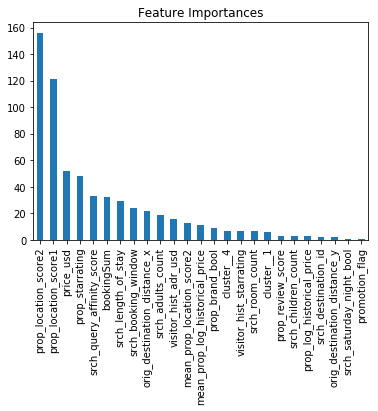

In [19]:
feat_imp = pd.Series(bst.get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [5]:
df = pd.read_csv('../data/20PercentTestWithMean.csv', delimiter=",",usecols=featuresToUse+[labelToPredict]+neededVars)
dfNeeded= df[neededVars+[labelToPredict]]
Y = df[labelToPredict]
df.drop(neededVars+[labelToPredict],axis=1,inplace=True)

In [6]:
xgmat_test = xgboost.DMatrix( df, label=Y)
y_pred = bst.predict(xgmat_test)

In [7]:
predictions = [round(value) for value in y_pred]
df = pd.concat([df,dfNeeded],axis=1)
df['y_pred'] = y_pred

In [8]:
def getScore(df):
    df['rank_srch_id'] = df.groupby('srch_id').cumcount().add(1)
    df['gain'] = 5*df['booking_bool']
    df['gain'] = np.where(df['gain'] == 0, df['click_bool'], df['gain'])

    df['g/rank'] = df['gain']/df['rank_srch_id']
    gi_sum = df['g/rank'].sum()
    
    df['gain_sorted'] = list(df[['srch_id', 'booking_bool', 'click_bool', 'gain']].sort_values(by = ['srch_id','booking_bool','click_bool'], ascending = [True, False, False])['gain'])
    df['g/rank_sorted'] = df['gain_sorted']/df['rank_srch_id']
    gi_sorted_sum = df['g/rank_sorted'].sum() 
    score = gi_sum/gi_sorted_sum
    return score, gi_sum, gi_sorted_sum

In [9]:
score, gi_sum, gi_sorted_sum = getScore(df.sort_values(by=['srch_id', 'y_pred'], ascending = [True, False]).reset_index(drop=True))
print(score)

# evaluate predictions
accuracy = accuracy_score(df['click_bool'], predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



0.7608807813513421
Accuracy: 68.78%


In [10]:
f=open("scores.txt", "a+")
f.write("Score: "+str(score)+"\n")
f.write("Label to predict: "+str(labelToPredict)+"\n")
f.write("Features used:\n")
f.write(str(list(featuresToUse)) +"\n")
f.write("Parameters xgboost:\n")
f.write(str(json.dumps(param))+"\n")
f.write("Number of rounds:\n"+str(num_round))
f.close()

In [11]:
os.rename(nameOfModel+".model",nameOfModel+str(int(score*100))+".model")
newNameOfModel = nameOfModel+str(int(score*100))

Lets combine the models

In [18]:
clickingModel = xgboost.Booster()
clickingModel.load_model(newNameOfModel+".model")
bookingModel = xgboost.Booster()
bookingModel.load_model('models/6mayBookingLabel.model')

In [19]:
df = pd.read_csv('../data/20PercentTestWithMean.csv', delimiter=",",usecols=featuresToUse+[labelToPredict]+neededVars)
dfNeeded= df[neededVars+[labelToPredict]]
df.drop(neededVars+[labelToPredict],axis=1,inplace=True)

In [20]:
xgmat_test = xgboost.DMatrix( df)
y_pred_clicking = clickingModel.predict(xgmat_test)
y_pred_booking = bookingModel.predict(xgmat_test)

In [21]:
df = pd.concat([df,dfNeeded],axis=1)
df['y_pred_clicking'] = y_pred_clicking
df['y_pred_booking'] = y_pred_booking
df['combined'] = y_pred_booking+y_pred_clicking

In [22]:
score_apart, gi_sum, gi_sorted_sum = getScore(df.sort_values(by=['srch_id', 'y_pred_booking', 'y_pred_clicking'], ascending = [True, False,False]).reset_index(drop=True))
score_combined, gi_sum, gi_sorted_sum = getScore(df.sort_values(by=['srch_id', 'combined'], ascending = [True, False]).reset_index(drop=True))
print("Sort first on booking and then on clicking: "+str(score_apart))
print("Combine then sort: "+str(score_combined))

Sort first on booking and then on clicking: 0.665437980291279
Combine then sort: 0.7504316335783239


Evaluation

In [2]:
dfTest = pd.read_csv("../data/testWithMean.csv")

In [4]:
clickingModel = xgboost.Booster({'nthread': -1})  # init model
#clickingModel.load_model(newNameOfModel+".model")  # load data
clickingModel.load_model("models/6mayClicking76.model")

In [7]:
xgmat_test_submission = xgboost.DMatrix(dfTest[featuresToUse])
y_pred_clicking = clickingModel.predict(xgmat_test_submission)
dfTest['predictedPos'] = y_pred_clicking
dfTest = dfTest.sort_values(['srch_id','predictedPos'],ascending=[True, False])
dfSubmission = dfTest[['srch_id','prop_id']]
dfSubmission.to_csv("submissionTest6may.csv",index=False)

In [25]:
df.isna().sum()/len(dfTest)

visitor_hist_starrating           0.759289
visitor_hist_adr_usd              0.759107
prop_starrating                   0.000000
prop_review_score                 0.001187
prop_brand_bool                   0.000000
prop_location_score1              0.000000
prop_location_score2              0.175887
prop_log_historical_price         0.000000
price_usd                         0.000000
promotion_flag                    0.000000
srch_destination_id               0.000000
srch_length_of_stay               0.000000
srch_booking_window               0.000000
srch_adults_count                 0.000000
srch_children_count               0.000000
srch_room_count                   0.000000
srch_saturday_night_bool          0.000000
srch_query_affinity_score         0.748670
orig_destination_distance_x       0.259277
comp1_rate                        0.780557
comp1_inv                         0.779012
mean_prop_starrating              0.000000
mean_prop_review_score            0.001187
mean_prop_b

In [23]:
dfTest.isna().sum()/len(dfTest)

srch_id                           0.000000
date_time                         0.000000
site_id                           0.000000
visitor_location_country_id       0.000000
visitor_hist_starrating           0.948897
visitor_hist_adr_usd              0.948656
prop_country_id                   0.000000
prop_id                           0.000000
prop_starrating                   0.000000
prop_review_score                 0.001465
prop_brand_bool                   0.000000
prop_location_score1              0.000000
prop_location_score2              0.219397
prop_log_historical_price         0.000000
price_usd                         0.000000
promotion_flag                    0.000000
srch_destination_id               0.000000
srch_length_of_stay               0.000000
srch_booking_window               0.000000
srch_adults_count                 0.000000
srch_children_count               0.000000
srch_room_count                   0.000000
srch_saturday_night_bool          0.000000
srch_query_